In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
train_dir = 'C:\Users\mohan\Downloads\Medicinal Herbs Identification\SOURCE CODE\model\Dataset\train'
test_dir = 'C:\Users\mohan\Downloads\Medicinal Herbs Identification\SOURCE CODE\model\Dataset\test'

In [3]:
batch_size = 1
epochs = 1
img_height = 180
img_width = 180

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 12000 images belonging to 200 classes.


In [6]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 5973 images belonging to 200 classes.


In [7]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.applications.xception import Xception


In [9]:
base_model = Xception(weights = 'imagenet', include_top=False, input_shape=(180, 180, 3))


In [10]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 89, 89, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 22, 22, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 22, 22, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 11, 11, 728)  186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 11, 11, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 11, 11, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 11, 11, 728)  536536     ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 11, 11, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 11, 11, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 11, 11, 728)  2912       ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 11, 11, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 11, 11, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 11, 11, 728)  0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 11, 11, 728)  0          ['add_10[0][0]']                 
 on)      

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D


In [13]:
xception_net = tf.keras.models.Sequential()

xception_net.add(base_model)
xception_net.add(GlobalAveragePooling2D())
xception_net.add(Dense(200, activation = 'softmax'))
xception_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 200)               409800    
                                                                 
Total params: 21,271,280
Trainable params: 409,800
Non-trainable params: 20,861,480
_________________________________________________________________


In [14]:
xception_net.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = xception_net.fit(train_data_gen, epochs=6,  
validation_data= val_data_gen,)                                  

Epoch 1/6
12000/12000 [==============================] - 1704s 141ms/step - loss: 2.4598 - accuracy: 0.4782 - val_loss: 1.0457 - val_accuracy: 0.7489
Epoch 2/6
12000/12000 [==============================] - 1726s 144ms/step - loss: 1.0808 - accuracy: 0.7373 - val_loss: 0.6013 - val_accuracy: 0.8579
Epoch 3/6
12000/12000 [==============================] - 1738s 145ms/step - loss: 0.6936 - accuracy: 0.8274 - val_loss: 0.4381 - val_accuracy: 0.8942
Epoch 4/6
12000/12000 [==============================] - 1155s 96ms/step - loss: 0.4859 - accuracy: 0.8777 - val_loss: 0.3137 - val_accuracy: 0.9300
Epoch 5/6
12000/12000 [==============================] - 1111s 93ms/step - loss: 0.3506 - accuracy: 0.9147 - val_loss: 0.2160 - val_accuracy: 0.9545
Epoch 6/6
12000/12000 [==============================] - 1114s 93ms/step - loss: 0.2653 - accuracy: 0.9357 - val_loss: 0.1672 - val_accuracy: 0.9679


In [16]:
xception_net.save('plant.h5')

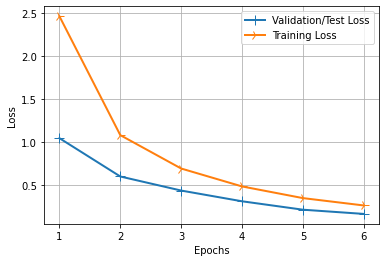

In [18]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

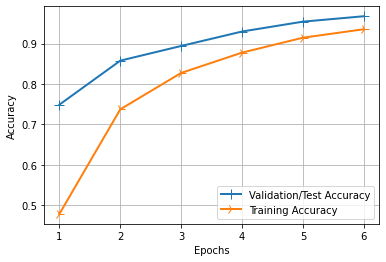

In [19]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()